In [12]:
root_dir = "/Users/torben/Code/breathmetrics_python/"
import sys
sys.path.insert(0, root_dir)

import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt

from breathmetrics.breathmetricsClass import bmObject

In [24]:
dataPath = os.path.join(root_dir, 'data', 'sample_data.mat')

myData=sp.io.loadmat(dataPath)
resp=np.squeeze(myData['resp'])
srate = np.squeeze(myData['srate'])

In [41]:
bm=bmObject(resp=resp,srate=srate,dataType='humanAirflow')
bm.estimateAllFeatures(baselineCorrectionMethod='sliding',zScore=1)

for a in bm.secondaryFeatures.keys():
    print("{0} {1}".format(a,bm.secondaryFeatures[a]))

0.19914506560208964
Breathing Rate 0.19914506560208964
Average Inter-Breath Interval 5.02146511627907
Average Peak Inspiratory Flow 1.7770152261696555
Average Peak Expiratory Flow -1.87601800028884
Average Inhale Volume 1751.6878168083801
Average Exhale Volume 1778.1460023914922
Average Tidal Volume 3529.8338191998723
Minute Ventilation 702.9489874890332
Duty Cycle of Inhale 0.3348225987967933
Duty Cycle of Inhale Pause 0.03153845085089093
Duty Cycle of Exhale 0.3734988861770168
Duty Cycle of Exhale Pause 0.25940176679792193
Coefficient of Variation of Inhale Duty Cycle 0.20389397186687905
Coefficient of Variation of Inhale Pause Duty Cycle 4.284816962202219
Coefficient of Variation of Exhale Duty Cycle 0.1679598470776132
Coefficient of Variation of Exhale Pause Duty Cycle 0.5230369447709333
Average Inhale Duration 1.6813000000000002
Average Inhale Pause Duration 0.15836923076923076
Average Exhale Duration 1.8755116279069768
Average Exhale Pause Duration 1.3025769230769233
Percent of B

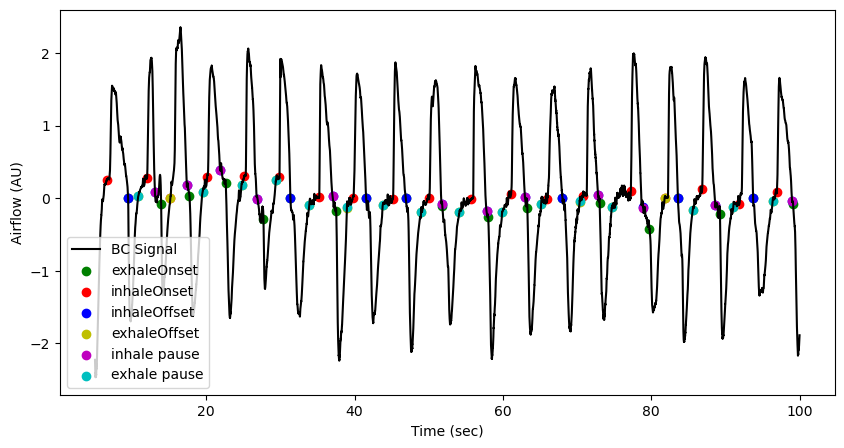

In [42]:
minPlotInd=5000
maxPlotInd=100000
plotInds = np.arange(minPlotInd,maxPlotInd)
plotExhaleOnsets = [i for i in bm.exhaleOnsets if i>minPlotInd and i <maxPlotInd]
plotInhaleOnsets = [i for i in bm.inhaleOnsets if i>minPlotInd and i <maxPlotInd]
plotExhaleOffsets = [int(i) for i in bm.exhaleOffsets[0,:] if i>minPlotInd and i <maxPlotInd]
plotInhaleOffsets = [int(i) for i in bm.inhaleOffsets[0,:] if i>minPlotInd and i <maxPlotInd]

plotExhalePauseOnsets = [int(i) for i in bm.exhalePauseOnsets[0,:] if i>minPlotInd and i <maxPlotInd]
plotInhalePauseOnsets = [int(i) for i in bm.inhalePauseOnsets[0,:] if i>minPlotInd and i <maxPlotInd]

WIDTH_SIZE=10;
HEIGHT_SIZE=5;

fig, axs = plt.subplots(1,1,figsize=(WIDTH_SIZE,HEIGHT_SIZE))
axs.plot(bm.time[plotInds],bm.baselineCorrectedRespiration[plotInds],'k-',label='BC Signal')
axs.scatter(bm.time[plotExhaleOnsets],bm.baselineCorrectedRespiration[plotExhaleOnsets],c='g',marker='o',label='exhaleOnset')
axs.scatter(bm.time[plotInhaleOnsets],bm.baselineCorrectedRespiration[plotInhaleOnsets],c='r',marker='o',label='inhaleOnset')

axs.scatter(bm.time[plotInhaleOffsets],bm.baselineCorrectedRespiration[plotInhaleOffsets],c='b',marker='o',label='inhaleOffset')
axs.scatter(bm.time[plotExhaleOffsets],bm.baselineCorrectedRespiration[plotExhaleOffsets],c='y',marker='o',label='exhaleOffset')

axs.scatter(bm.time[plotInhalePauseOnsets],bm.baselineCorrectedRespiration[plotInhalePauseOnsets],c='m',marker='o',label='inhale pause')
axs.scatter(bm.time[plotExhalePauseOnsets],bm.baselineCorrectedRespiration[plotExhalePauseOnsets],c='c',marker='o',label='exhale pause')

axs.set_ylabel('Airflow (AU)')
axs.set_xlabel('Time (sec)')
axs.legend();